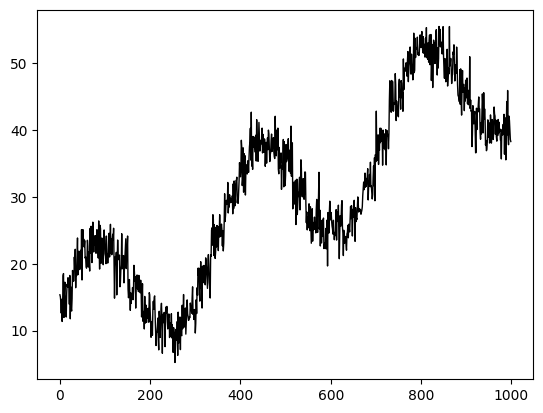

In [1]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
from   statsmodels.tsa.seasonal import seasonal_decompose

### Ejemplo: generamos datos con estacionalidad
#np.random.seed(42)

number_of_days  = 1000

date_range      = pd.date_range(start='2025-01-01', periods=number_of_days, freq='D')

trend           = np.linspace(10, 50, number_of_days)  # linear trend

seasonality     = 10*np.sin(2*np.pi*date_range.month/12)

noise           = np.random.normal(0, 2, number_of_days)

### Componemos la serie temporal
data            = trend + seasonality + noise


### graficamos
plt.plot(data,color="black",lw=1)
plt.show()


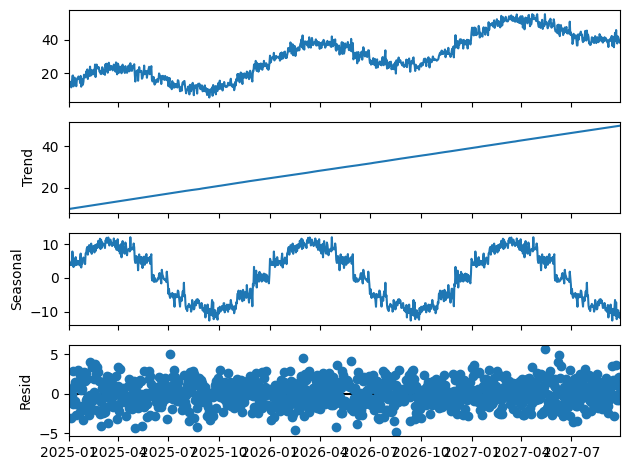

In [3]:

### Creamos la serie de tiempo en un DataFrame
ts = pd.Series(data, index=date_range)

### Descomponemos la serie con "seasonal_decompose"
decomposition = seasonal_decompose(ts, model='additive', period=365,extrapolate_trend=1)

"""
print(ts)
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)
"""

### Graficamos las componentes

decomposition.plot()
plt.tight_layout()
plt.show()



In [5]:
print( np.mean( decomposition.resid ) )
print( np.std( decomposition.resid ) )


0.02990333384777209
1.5658545447838572


La media es: 11.7552
La desv. estandar es: 4.156521738184464


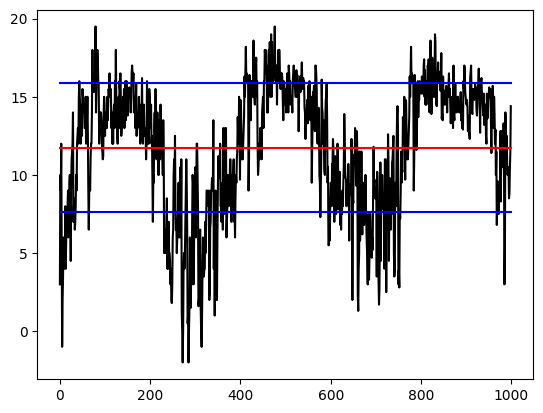

In [7]:

file_id = "17iCHWJF4gU0litHn0ZGnKS8hbTsOXE39"
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

TabData  = pd.read_csv(download_url,sep="\t")
TabData.head()

Ns = 1000
Temp = TabData.iloc[:,4].replace('NULO',np.nan).astype(float)
Temp = Temp.dropna()

Temp = np.asarray(Temp)
muestraT = Temp[0:Ns]
print("La media es:", np.mean(muestraT) )
print( "La desv. estandar es:",np.std(muestraT) )
plt.plot(muestraT,color='black')
plt.plot( np.ones(Ns)*np.mean(muestraT) ,color='red')
plt.plot( np.ones(Ns)*( np.mean(muestraT) + np.std(muestraT) )  ,color='blue')
plt.plot( np.ones(Ns)*( np.mean(muestraT) - np.std(muestraT) )  ,color='blue')








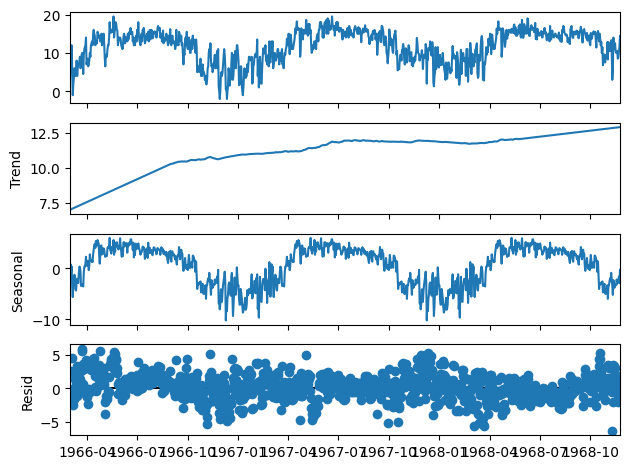

In [11]:

## definimos fechas con formato datetime
Fech = TabData.iloc[:,0]
FechasTemp = pd.to_datetime(Fech[0:Ns])

## definimos el intervalo de fechas:

ts = pd.Series(muestraT, index=FechasTemp)

### Descomponemos la serie con "seasonal_decompose"
decomposition = seasonal_decompose(ts, model='additive', period=365,extrapolate_trend=1)

### Graficamos las componentes
decomposition.plot()
plt.tight_layout()
plt.show()


